## Import modules for MNIST data, Logistic Regression, SVM, DNN

In [18]:
## import modules
import numpy as np
from matplotlib import pyplot as plt

## MNIST Dataset
#from keras.datasets import mnist

## Logistic Regression model
from sklearn.linear_model import LogisticRegression

## SVM model
from sklearn.svm import SVC

## Keras for DNN
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

## Import MNIST data 
### Data Preparation - only 9 and 3

In [2]:
## Import MNIST data 
b = np.load('./data/mnist.npz')
## train and test data
X_train, y_train, X_test, y_test = b['x_train'], b['y_train'], b['x_test'], b['y_test']

In [3]:
## Import MNIST data from Keras dataset library
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Train data
# Extract all 9s and  3s
y_train_9 = y_train[y_train == 9]
y_train_3 = y_train[y_train == 3]
X_train_9 = X_train[y_train == 9]
X_train_3 = X_train[y_train == 3]

## concatenate 9 and 3
X_train2 = np.concatenate((X_train_9, X_train_3), axis=0)
y_train2 = np.concatenate((y_train_9, y_train_3), axis=0)

###  Test Data
# Extract all 9s and 3s
y_test_9 = y_test[y_test == 9]
y_test_3 = y_test[y_test == 3]
X_test_9 = X_test[y_test == 9]
X_test_3 = X_test[y_test == 3]

## Concatenate both 9 and 3
X_test2 = np.concatenate((X_test_9, X_test_3), axis=0)
y_test2 = np.concatenate((y_test_9, y_test_3), axis=0)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)
np.unique(y_train2)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(12080, 28, 28) (2019, 28, 28) (12080,) (2019,)


array([3, 9], dtype=uint8)

## Data Visualization

Sahpe of training data :  (12080, 28, 28)
label ;  3


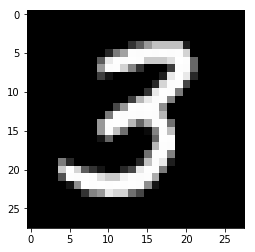

In [25]:
## data review and visuqlization
print("Sahpe of training data : ", X_train2.shape)
i = 11009
print("label ; ", y_train2[i])
plt.imshow(X_train2[i], cmap='gray')
plt.show()

## Feature Engineering

In [26]:
## Feature Engineering - Normalization
X_train3 = X_train2.astype('float32')/255.
X_test3 = X_test2.astype('float32')/255.

## Reshape from 28 by 28 to 784 for model
X_train4 = X_train3.reshape(len(X_train3), np.prod(X_train3.shape[1:]))
X_test4 = X_test3.reshape(len(X_test3), np.prod(X_test3.shape[1:]))

In [27]:
print(X_train3.shape, X_test3.shape)
print(X_train4.shape, X_test4.shape)

(12080, 28, 28) (2019, 28, 28)
(12080, 784) (2019, 784)


In [8]:
## Prepare y variables
y_train_binary = y_train2 == 9
y_test_binary = y_test2 == 9

print(np.unique(y_train_binary, return_counts=True))
print(y_train_binary[:10])
print(y_train_binary[1])
print(type(y_train_binary[1]))
y_train_binary[1] == 1

(array([False,  True]), array([6131, 5949], dtype=int64))
[ True  True  True  True  True  True  True  True  True  True]
True
<class 'numpy.bool_'>


True

## Train Algorithms
### Logistic Regression
### Train Logistic Regression model with training data

In [9]:
## Logistic Regression as model
log_reg = LogisticRegression()

## Train the model
log_reg.fit(X_train4, y_train_binary)
log_reg.coef_, log_reg.intercept_

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+0

In [29]:
print(len(log_reg.coef_[0]))

784


### Validate the trained logistic regression model with test data

In [10]:
### Validate the accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_test4, y_test_binary, cv=3, scoring="accuracy")  ### three folding validataion

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.97181009, 0.96879643, 0.98214286])

### SVM 

In [31]:
## Pick up SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))

## Train the model
svm_clf.fit(X_train4, y_train_binary)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
### Validate the accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_test4, y_test_binary, cv=3, scoring="accuracy")  ### three folding validataion

array([0.97181009, 0.96879643, 0.97916667])

### Deep Neural Network

In [13]:
## Build the model
model = Sequential()
model.add(Dense(100, input_dim=X_train4.shape[1], activation='relu'))
#model.add(Dropout(0.75))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.75))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.75))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 84,591
Trainable params: 84,591
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Set up Callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [34]:
## Model 1
## Train the model with equal weight on True/False label
n_epochs = 50
batch_size = 512
validation_split = 0.01

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['binary_accuracy'])

model.fit(X_train4, y_train_binary, epochs=n_epochs, batch_size=batch_size, shuffle=True, 
          validation_split=validation_split, callbacks=callbacks, verbose=1)

Train on 11959 samples, validate on 121 samples
Epoch 1/50
11959/11959 [==============================] - 0s 36us/step - loss: 0.0018 - binary_accuracy: 0.9995 - val_loss: 0.0383 - val_binary_accuracy: 0.9917
Epoch 2/50
11959/11959 [==============================] - 0s 13us/step - loss: 9.2266e-04 - binary_accuracy: 0.9998 - val_loss: 0.0320 - val_binary_accuracy: 0.9917
Epoch 3/50
11959/11959 [==============================] - 0s 13us/step - loss: 3.6550e-04 - binary_accuracy: 1.0000 - val_loss: 0.0168 - val_binary_accuracy: 0.9917
Epoch 4/50
11959/11959 [==============================] - 0s 13us/step - loss: 6.8624e-04 - binary_accuracy: 0.9998 - val_loss: 0.0559 - val_binary_accuracy: 0.9917
Epoch 5/50
11959/11959 [==============================] - 0s 13us/step - loss: 4.5476e-04 - binary_accuracy: 1.0000 - val_loss: 0.0340 - val_binary_accuracy: 0.9917
Epoch 6/50
11959/11959 [==============================] - 0s 12us/step - loss: 1.5445e-04 - binary_accuracy: 1.0000 - val_loss: 0.0

In [17]:
## Evaludation socre
score = model.evaluate(X_test4, y_test_binary, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028065607581569726
Test accuracy: 0.9925705794947994
